<a href="https://colab.research.google.com/github/anajikadam/Clinical-Trial-Search-Engine/blob/main/Medical_Embeddings_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technologies Used: Python, Gensim, Word2Vec, FastText, Streamlit, Git
The Project aims to train SkipGram and FastText Models on COVID-19 Clinical Trials Dataset and builds a Search Engine where user can type any COVID-19 related keyword and it presents all the top n similar results from the dataset

# Medical Embeddings and Clinical Trial Search Engine



## What does the code do?
The Project aims to train SkipGram and FastText Models on COVID-19 Clinical Trials Dataset and builds a Search Engine where user can type any COVID-19 related keyword and it presents all the top n similar results from the dataset

## Word2Vec and FastText Word Embedding with Gensim

### Business Context:
We all must have wondered that if we search for a particular word in google, it does not show just the results that contain the very same word but also shows results that are very closely related to it. For example, if we search for the term ‘medicine’ in google, you can see results that not just include the word ‘medicine’ but also terms such as "health", "pharmacy", "WHO", and so on.

So, google somehow understands that these terms are closely related to each other. This is where word embeddings come into the picture. Word embeddings are nothing but numerical representations of words in a sentence depending on the context.

General word embeddings might not perform well enough on all the domains. Hence, we need to build domain-specific embeddings to get better outcomes. In this project, we will create medical word embeddings using Word2vec and FastText in python.

### Data Description
We are considering a clinical trials dataset for our project based on Covid-19.

There are 10666 rows and 21 columns present in the dataset. The following two columns are essential for us,
- Title
- Abstract

## Aim
This project aims to use the trained models (Word2Vec and FastText) to build a search engine and Streamlit UI.

To develop a machine learning application that can understand the relationship and pattern between various words used together in the field of medical science, create a smart search engine for records containing those terms, and finally build a machine learning pipeline in azure to deploy and scale the application.

## Tech stack
- Language - Python
- Libraries and Packages - Pandas, Numpy, Matplotlib, Plotly, Gensim, Streamlit, NLTK.

## Approach

- Importing the required libraries
- Reading the dataset
- Pre-processing
- Remove URLs
- Convert text to lower case
- Remove numerical values
- Remove punctuation.
- Perform tokenization
- Remove stop words
- Perform lemmatization
- Remove ‘\n’ character from the columns
- Exploratory Data Analysis (EDA)
- Data Visualization using word cloud
- Training the ‘Skip-gram’ model
- Training the ‘FastText’ model
- Model embeddings – Similarity
- PCA plots for Skip-gram and FastText models
- Convert abstract and title to vectors using the Skip-gram and FastText model
- Use the Cosine similarity function
- Perform input query pre-processing
- Define a function to return top ‘n’ similar results
- Result evaluation
- Run the Streamlit Application
- Run streamlit run medical.py in notebook




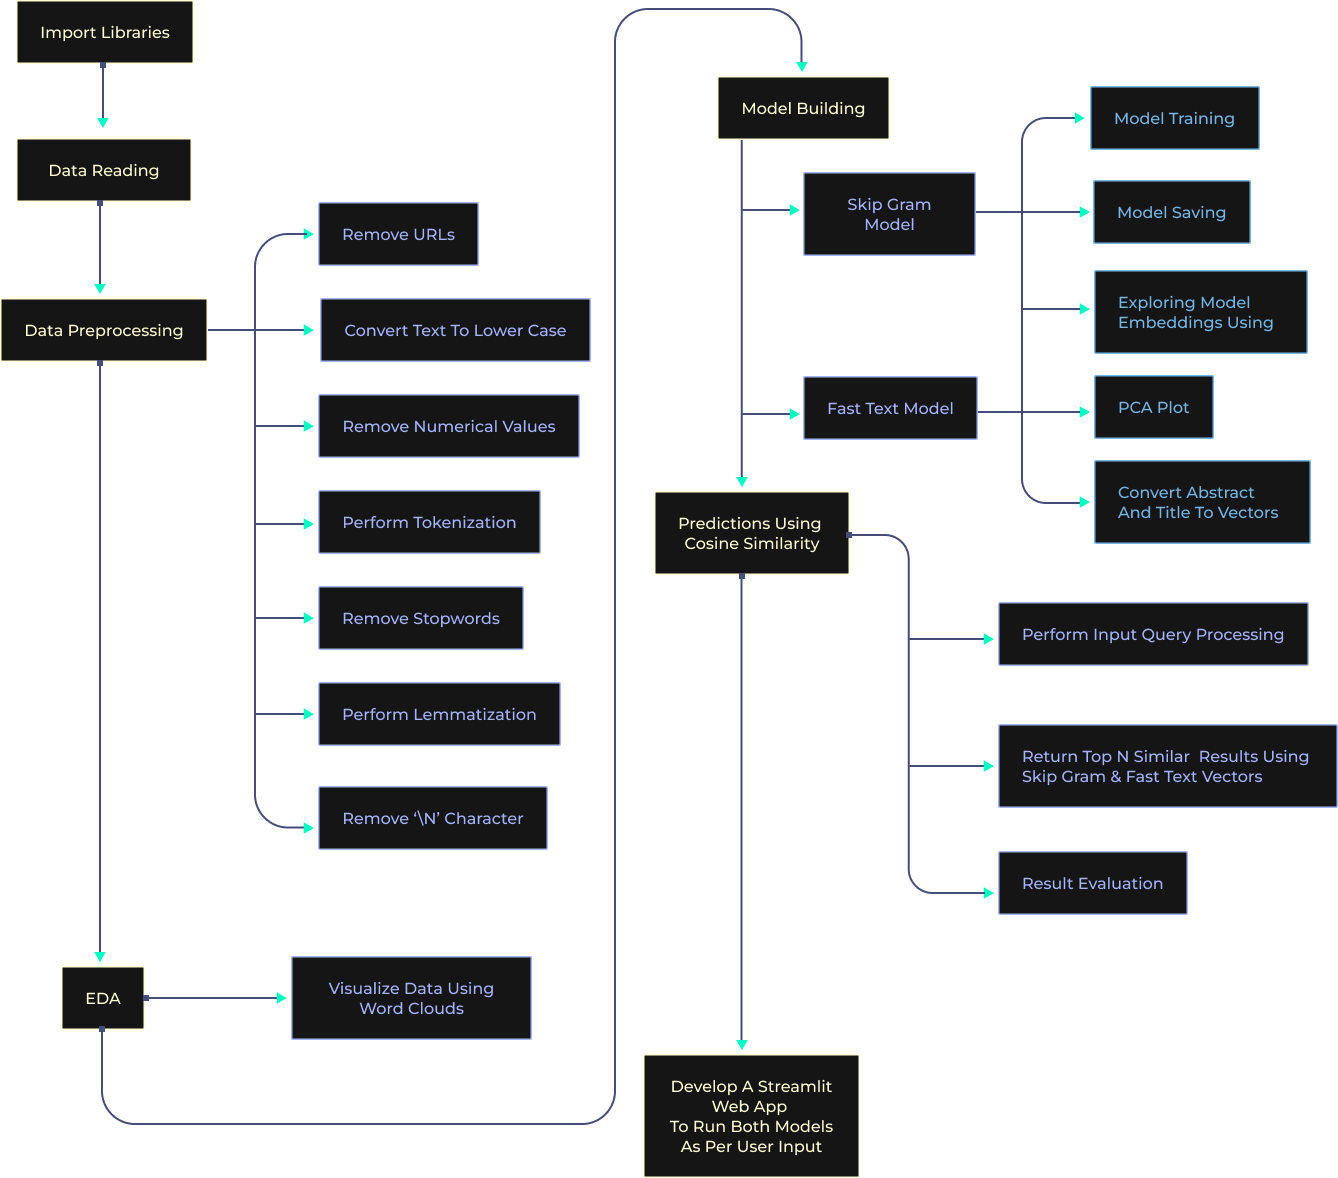

### Project Takeaways
- Understanding the business problem
- Understanding the architecture to build the Streamlit application
- Learning the Word2Vec and FastText model
- Importing the dataset and required libraries
- Data Pre-processing
- Performing basic Exploratory Data Analysis (EDA)
- Training the Skip-gram model with varying parameters
- Training the FastText model with varying parameters
- Understanding and performing the model embeddings
- Plotting the PCA plots
- Getting vectors for each attribute
- Performing the Cosine similarity function
- Pre-processing the input query
- Evaluating the results
- Creating a function to return top ‘n’ similar results for a given query
- Understanding the code for executing the Streamlit application.
- Run the Streamlit application.

# Imports

In [ ]:
# !pip install streamlit

In [ ]:
import os
import streamlit as st

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

import gensim
from gensim.models import Word2Vec, FastText

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import plotly.graph_objects as go

import string # used for preprocessing
import re # used for preprocessing

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords       # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
# nltk.download()
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Importing Datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving inputData_Dimension-covid.csv to inputData_Dimension-covid.csv


In [ ]:
df = pd.read_csv("/content/inputData_Dimension-covid.csv")

In [ ]:
df.shape

(10666, 21)

In [ ]:
df.head(3)

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,Intervention,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,The aim was to determine the coronavirus anxie...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,A survey form was applied to individuals inclu...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,This is a randomized controlled trial to exami...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,Placebo (Dietary Supplement); palmitoylethanol...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,The purpose of this study is to learn how to b...,2021-04-14,2021; 2022,NaN,Covid19,PneumoniaCheck (Device),All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...


# Data Preprocessing

Steps:
- **Cleaning the text data**
    - Stripping unwanted characters like puntuation or other non-letter characters
    

- **Tokenization**
    - Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.
    
- **Stemming/Lemmatization**
    - Converting a word into it's root form.
    
    - Stemming identifies the common root form of a word by removing or replacing word suffixes (e.g. “flooding” is stemmed as “flood”), while lemmatization identifies the inflected forms of a word and returns its base form (e.g. “better” is lemmatized as “good”).
    
    - Lemmatization is computationally more difficult and expensive compared to stemming. However it is obsereved there is little impact on the performance of text classification so we can use any of them.
    

- **Stop Words Removal**
    - Commonly ocurring words in texts like ```is, and, has, like, etc..``` and probably bear no (or only a little) useful information that can be used to distinguish between different classes of documents.
    

The following two columns are essential for us,
* Title
* Abstract

In [ ]:
data = df[['Title', 'Abstract']]
df = data.copy()

In [ ]:
df['Title'][0]

'The Relationship Between Coronavirus Anxiety Level and Emotional Eating in Individuals With Metabolic Syndrome'

In [ ]:
df['Abstract'][0]

'The aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects.\n\nDetailed Description\nThe aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects. This study was completed with the descriptive, cross-sectional and relational screening model. The full sampling method was used in the study. The study was completed with 105 individuals with metabolic syndrome attending the diet clinic and 109 healthy individuals without MetS diagnosis also attending the diet clinic. Collection of data used anthropometric measurements and biochemical findings, blood pressure and a survey f

In [ ]:
# lower-case the text
def text_lowercase(text: str):
    return text.lower()


# remove any urls in the text(if present)
def remove_urls(text: str):

    pattern = "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"
    new_text = " ".join(re.sub(pattern, " ", text, flags=re.MULTILINE).split())

    return new_text


# remove any numbers
def remove_numbers(text: str):
    new_text = re.sub(r'\d+', '', text)
    return new_text

# remove any puntuations
def remove_punctuation(text: str):
    translator = str.maketrans('', '', string.punctuation)

    return text.translate(translator)

# tokenize
def tokenize(text: str):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text: str):
    # text = [word for word in text if word not in stop_words]
    text = [word for word in text if not word in stop_words]
    return text


# lemmatize Words
lemmatizer = WordNetLemmatizer()
def lemmatize(text: str):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

# Preprocessing
def preprocessing(text: str):
    # text = text.strip()

    # lower-case the text
    text = text_lowercase(text)

    # remove any urls in the text(if present)
    text = remove_urls(text)

    # remove any numbers
    text = remove_numbers(text)

    # remove any puntuations
    text = remove_punctuation(text)

    # tokenize
    text = tokenize(text)

    # remove stopwords
    text = remove_stopwords(text)

    # lemmatize
    text = lemmatize(text)

    text = " ".join(text)
    return text

In [ ]:
# Preprocessing code Works!

# text = ''
# for i in range(df.shape[0]):
#     if "https:" in df['Abstract'][i]:
#         text = df['Abstract'][i]
#         break

# preprocessing(text)

### Applying Preprocessing on ```Abstract``` column

In [ ]:
# Applying preprocessing and removing '\n' character

df1 = df.copy()

for i in range(df1.shape[0]):
    text = str(df1['Abstract'][i])

    text = preprocessing(text)

    text = text.replace("\n", " ")

    df1['Abstract'].loc[i] = text

In [ ]:
df1[['Abstract']].head(3)

,Abstract
0,aim determine coronavirus anxiety level emotio...
1,randomized controlled trial examine effect foo...
2,purpose study learn better detect infection un...


In [ ]:
print("After Processing\n-----------------\n")
print(df1['Abstract'][0])

print("\n----------------------\nBefore Processing\n---------------\n")
print(df['Abstract'][0])

After Processing
-----------------

aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject detailed description aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject study completed descriptive cross sectional relational screening model full sampling method used study study completed individual metabolic syndrome attending diet clinic healthy individual without mets diagnosis also attending diet clinic collection data used anthropometric measurement biochemical finding blood pressure survey form coronavirus anxiety scale ca emotional eating scale ee

----------------------
Before Processing
---------------

The aim was to determine the coronavirus anxiety levels and emotional eating sta

### Applying Preprocessing on ```Title``` column

In [ ]:
# Applying preprocessing and removing '\n' character

for i in range(df1.shape[0]):
    text = str(df1['Title'][i])

    text = preprocessing(text)

    text = text.replace("\n", " ")

    df1['Title'].loc[i] = text

In [ ]:
print("After Processing\n-----------------\n")
print(df1['Title'][0])

print("\n----------------------\nBefore Processing\n---------------\n")
print(df['Title'][0])

After Processing
-----------------

relationship coronavirus anxiety level emotional eating individual metabolic syndrome

----------------------
Before Processing
---------------

The Relationship Between Coronavirus Anxiety Level and Emotional Eating in Individuals With Metabolic Syndrome


In [ ]:
# Tokenizing data for training purpose
x = [word_tokenize(word) for word in df1.Abstract ]

# Exploratory data analysis

In EDA we are exploring the most common words in the corpus

In [ ]:
from collections import Counter

cnt = Counter()

for text in df1['Abstract'].values:
    for word in text.split():
        cnt[word] += 1


# Top 10 common words
cnt.most_common(10)

[('patient', 38457),
 ('covid', 38211),
 ('study', 31963),
 ('group', 12771),
 ('treatment', 12471),
 ('day', 12337),
 ('sars', 11600),
 ('cov', 11535),
 ('clinical', 11507),
 ('disease', 11395)]

# wordcloud

This is a medical dataset related to COVID and clearly we can see the most common words as ```patient, covid, sars,```etc..

In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from textwrap import wrap

from pandas.core.common import flatten
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

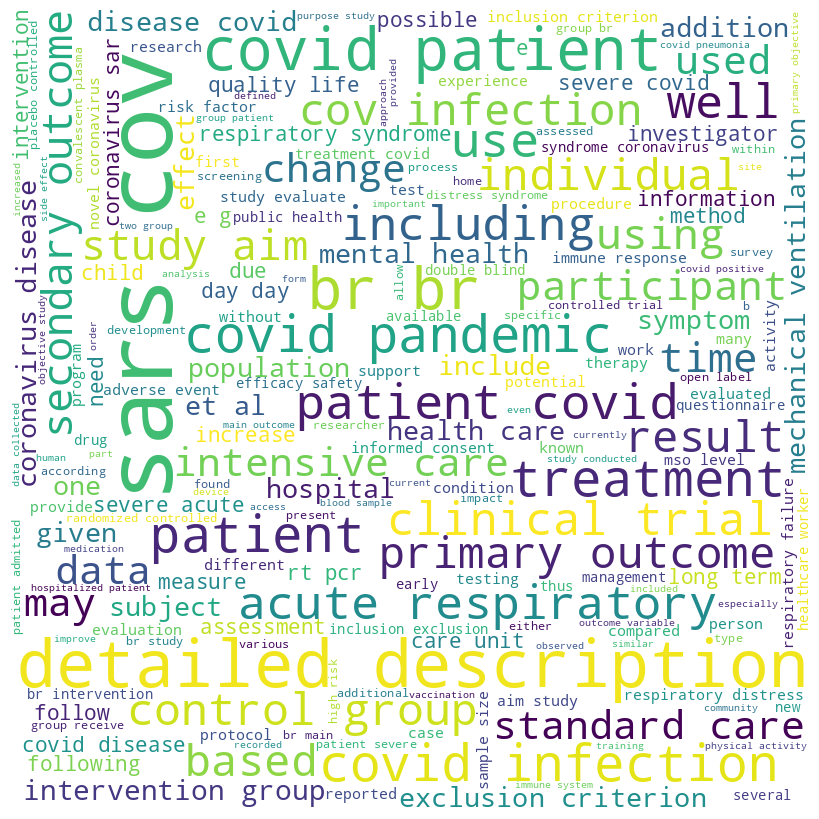

In [ ]:
# Final word cloud after all the cleaning and pre-processing

# iterate through the csv file
comment_words = flatten(x)
comment_words = ' '.join(comment_words)

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)


# plot the wordcloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show();

# Training Models

### SkipGram Model

In [ ]:
# Word2Vec

### training another skipgram model with vector_size=50 & window=3

In [ ]:
import os
from gensim.models import Word2Vec

skipgram = Word2Vec(sentences=x, vector_size=50, window=3, min_count=2, sg=1)

'''
Here:
    x = is our dataset that we prepared after preprocessing
    vector_size = size of the vector for each word
    window = the window size for context words
    min_count = only those words that has appeared atleast 2 times in the corpus
    sg : {0, 1}, optional
         Training algorithm: 1 for skip-gram; otherwise CBOW
'''


In [ ]:
print(skipgram)

Word2Vec<vocab=24877, vector_size=50, alpha=0.025>


### Saving the model

In [ ]:
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

skipgram.save('saved_models/skipgram_50.bin')

### training another skipgram model with vector_size=100 & window=1

In [ ]:

skipgram = Word2Vec(sentences=x, vector_size=100,
                    window=1, min_count=2, sg=1)

print(skipgram)

# Saving the model
os.makedirs('saved_models', exist_ok=True)

skipgram.save("saved_models/skipgram_100.bin");

Word2Vec<vocab=24877, vector_size=100, alpha=0.025>


In [ ]:
# Loading the model
skipgram = Word2Vec.load('saved_models/skipgram_100.bin')

### FastText Model

In [ ]:
# FastText
from gensim.models import FastText

### training FastText model with vector_size=200 and window=3

In [ ]:

fast_n = FastText(sentences=x, vector_size=200, window=3,
                  min_count=2, workers = -1,
                  min_n = 1, max_n=2, sg = 1)

'''
Since fasttext model takes character as input:
    min_n = 1, max_n = 2 --> tells how many characters to feed into the model

    workers = -1 --> All cores will be used
'''

# Saving the model
os.makedirs("saved_models", exist_ok=True)

fast_n.save("saved_models/fast_text_200.bin")

In [ ]:
# Loading the model

fast_n = Word2Vec.load("saved_models/fast_text_200.bin")

### training FastText model with vector_size=100 and window=3

In [ ]:
# Training another model

fasttext = FastText(sentences=x, vector_size=100,
                    min_count=2, workers=-1,
                    min_n=1, max_n=2, sg=1)

fasttext.save("saved_models/fast_text_100.bin")

# Model embeddings - Similarity

### SkipGram

The trained word vectors are stored in a ```KeyedVectors``` instance, as ```model.wv```

In [ ]:
skipgram.wv.index_to_key  # List of all words in list

skipgram.wv.key_to_index # List of all word in dict

len(skipgram.wv.index_to_key)

24877

In [ ]:
skipgram.wv.index_to_key[:10]

['patient',
 'covid',
 'study',
 'group',
 'treatment',
 'day',
 'sars',
 'cov',
 'clinical',
 'disease']

In [ ]:
import itertools

word_dict = skipgram.wv.key_to_index
dict(itertools.islice(word_dict.items(), 10))

{'patient': 0,
 'covid': 1,
 'study': 2,
 'group': 3,
 'treatment': 4,
 'day': 5,
 'sars': 6,
 'cov': 7,
 'clinical': 8,
 'disease': 9}

In [ ]:
# Getting of vector representation of a word

skipgram.wv['india'].shape, skipgram.wv['india']

((100,),
 array([-0.15811804,  0.5803165 ,  0.20129141, -0.2092284 , -0.5874236 ,
        -0.88081557, -0.22855808,  1.042343  ,  0.37678975, -0.14322083,
        -0.32921493, -0.6357874 ,  0.03919001, -0.29123938, -0.37615323,
        -0.17078404, -0.25749528,  0.17109883,  0.18040837,  0.05692033,
         0.09204194,  0.58556527, -0.13511793,  0.2304193 , -0.3151132 ,
        -0.04473854,  0.1416807 ,  0.08077024, -0.47593904,  0.31094483,
         0.17550159, -0.0794676 ,  0.30387506,  0.23121493, -0.28000137,
         0.37098897,  0.03644333, -0.33353975, -0.05310575, -0.08307977,
         0.15647332, -0.21820806,  0.42451027,  0.16411021,  0.5247457 ,
         0.34771487, -0.36848313,  0.13523309, -0.3028501 ,  0.19381069,
         0.33908787, -0.08223937, -0.23968291, -0.92536396, -0.23757757,
        -0.3169272 ,  0.44018847, -0.28297782, -0.29178476, -0.33149585,
         0.48611084, -0.18186966,  0.27683893,  0.73999685, -0.27760136,
         0.7594486 ,  0.6817551 ,  0.39925

In [ ]:
# Word Similarity: Compute cosine similarity between two keys.
pairs = [
    ('coronavirus', 'covid'),
    ('coronavirus', 'covid19'),
    ('coronavirus', 'sars'),
    ('coronavirus', 'death'),
    ('coronavirus', 'vaccine'),
    ('coronavirus', 'pandemic'),
    ('coronavirus', 'disease'),
    ('coronavirus', 'italy'),
    ('coronavirus', 'china'),
    ('coronavirus', 'india'),
]

for w1, w2 in pairs:
    try:
        print('%r\t%r : %.2f' % (w1, w2, skipgram.wv.similarity(w1, w2)))
    except Exception as e:
        print(f"\n{w2} not present in corpus")
        print(e,"\n")

'coronavirus'	'covid' : 0.66

covid19 not present in corpus
"Key 'covid19' not present" 

'coronavirus'	'sars' : 0.68
'coronavirus'	'death' : 0.34
'coronavirus'	'vaccine' : 0.31
'coronavirus'	'pandemic' : 0.49
'coronavirus'	'disease' : 0.45
'coronavirus'	'italy' : 0.43
'coronavirus'	'china' : 0.55
'coronavirus'	'india' : 0.43


### **Unfortunately, the model is unable to infer vectors for unfamiliar words. This is one limitation of Word2Vec**: if this limitation matters to you, check out the FastText model.

In [ ]:
try:
    vec_Italy = skipgram.wv['namaste']
except KeyError:
    print("The word 'namaste' does not appear in this model")

The word 'namaste' does not appear in this model


In [ ]:
# Print the 5 most similar words to 'china' or 'death'

skipgram.wv.most_similar(positive=['corona', 'death'], topn=5)

[('sari', 0.752745509147644),
 ('novelty', 0.7515352368354797),
 ('nonetheless', 0.7479710578918457),
 ('covd', 0.7442442178726196),
 ('fatality', 0.7436125874519348)]

In [ ]:
# Similar words - skipgram

skipgram.wv.most_similar(positive=['corona'], topn=10)

[('coronavirus', 0.7559102773666382),
 ('covid', 0.7017616629600525),
 ('evd', 0.6867353916168213),
 ('novelty', 0.6823076605796814),
 ('crown', 0.67862868309021),
 ('ebola', 0.6714343428611755),
 ('declares', 0.6612410545349121),
 ('virulent', 0.6596739292144775),
 ('coronovirus', 0.659477710723877),
 ('betacoronavirus', 0.6565569043159485)]

In [ ]:
skipgram.wv.most_similar(positive=['patient'], topn=10)

[('hospitalised', 0.7472862601280212),
 ('subject', 0.740917980670929),
 ('participant', 0.7336570024490356),
 ('acutely', 0.7294930219650269),
 ('individual', 0.7272758483886719),
 ('moderately', 0.7180664539337158),
 ('recovering', 0.7093906998634338),
 ('survivor', 0.6913213133811951),
 ('pwcf', 0.6901830434799194),
 ('lymphocytopenia', 0.6890446543693542)]

## FastText

In [ ]:
for w1, w2 in pairs:
    try:
        print('%r\t%r : %.2f' % (w1, w2, fasttext.wv.similarity(w1, w2)))
    except Exception as e:
        print(f"\n{w2} not present in corpus")
        print(e,"\n")

'coronavirus'	'covid' : 0.46
'coronavirus'	'covid19' : 0.26
'coronavirus'	'sars' : 0.49
'coronavirus'	'death' : 0.01
'coronavirus'	'vaccine' : 0.22
'coronavirus'	'pandemic' : 0.24
'coronavirus'	'disease' : 0.21
'coronavirus'	'italy' : 0.10
'coronavirus'	'china' : 0.17
'coronavirus'	'india' : 0.16


In [ ]:
fasttext.wv.most_similar(positive=['corona', 'death'], topn=10)

[('anticorona', 0.6930738687515259),
 ('northcards', 0.672627866268158),
 ('conversational', 0.6555590033531189),
 ('strathclyde', 0.6460632085800171),
 ('atherothrombosis', 0.6436590552330017),
 ('carolina', 0.6432142853736877),
 ('dearth', 0.642473578453064),
 ('atherosclerotic', 0.6388640999794006),
 ('collaborative', 0.6382637619972229),
 ('throat', 0.6382423639297485)]

In [ ]:
# Similar words - fasttext

fasttext.wv.most_similar(positive=['lung'], topn=10)

[('blunting', 0.7701618671417236),
 ('ltigung', 0.7395897507667542),
 ('leung', 0.7326470613479614),
 ('hung', 0.719277560710907),
 ('unwilling', 0.7082127928733826),
 ('long', 0.6991293430328369),
 ('lungiq', 0.6957274675369263),
 ('laung', 0.6932935118675232),
 ('lang', 0.6844402551651001),
 ('unlocking', 0.6691715717315674)]

In [ ]:
fasttext.wv.most_similar(positive=['breathing'], topn=10)

[('rebreathing', 0.8758812546730042),
 ('breath', 0.8046075701713562),
 ('breaching', 0.7950540781021118),
 ('threatening', 0.7787477970123291),
 ('breathable', 0.7583754062652588),
 ('breaking', 0.7475855350494385),
 ('gathering', 0.741095244884491),
 ('breathe', 0.7297273874282837),
 ('moderating', 0.7292203903198242),
 ('bathing', 0.7261358499526978)]

**It seems that Word Similarity is better in SkipGram**

# PCA Plots


## SkipGram

In [ ]:
X = skipgram.wv[skipgram.wv.index_to_key] # storing arrays of all words

pca = PCA(n_components=2)       # applying PCA to convert data in 2 dimensions
result = pca.fit_transform(X)

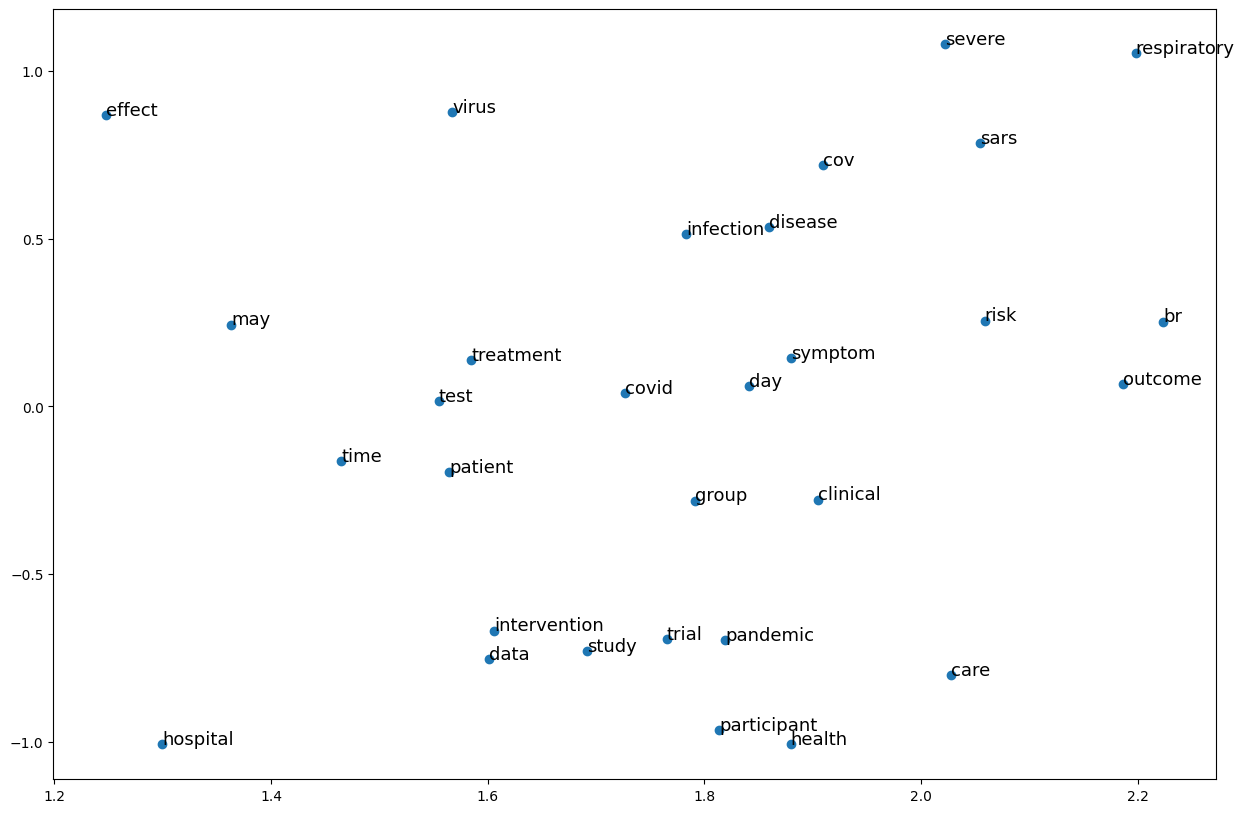

In [ ]:
# Word embedding on the plot to check 2D-rep. of each word

plt.figure(figsize=(15,10))
plt.scatter(result[:30, 0], result[:30, 1])

words = list(skipgram.wv.index_to_key)
for i, word in enumerate(words[:30]):
    plt.annotate(word, xy=(result[i,0], result[i,1]), fontsize=13)

plt.show();

## FastText

In [ ]:
X_fast = fasttext.wv[fasttext.wv.index_to_key]

pca = PCA(n_components=2)
result_fast = pca.fit_transform(X_fast)

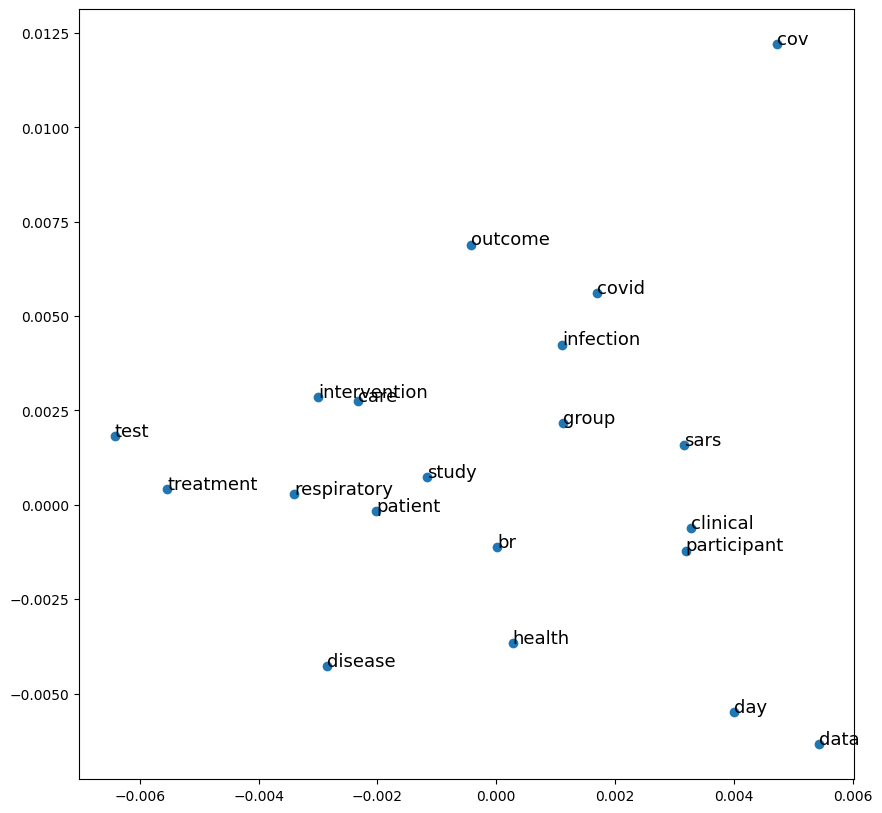

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(result_fast[:20, 0], result_fast[:20, 1])

words = list(fasttext.wv.index_to_key)
for i, word in enumerate(words[:20]):
    plt.annotate(word, xy=(result_fast[i, 0], result_fast[i,1]), fontsize=13)

plt.show();

# Getting Vectors for Each Abstract

Basically below what we are doing is:

- From the Word2Vec model we have vector representation of each word in the whole corpus
    
- Now, we want vector representation of each "Abstract" i.e each sentence(row) of the DataFrame

- So, for that what we are doing is:

    - We are summing the vect. rep. of each word in that sentence and averaging it out to get the vect. rep. of the sentence

### Method 1


In [ ]:
vector_size = 100 # defining vector size for each word

In [ ]:
%%time

# Function to take average of all vectors of each word in each abstract, so that
# each abstract represent (1,100) dimensional vector

# Creating a list to store vector representation of each abstract
K1 = []

# iterating through all the abstracts in the dataset
for i in range(df1.shape[0]):
    K = np.zeros([vector_size, 1]) # Creating an empty array of size (vec_size,1) to add vector representation of each word
    count = 0                      # Creating a count to check how many words are used from the abstract

    # iterating through all the abstracts in the dataset
    for word in word_tokenize(df1['Abstract'][i]):
        if word in list(fasttext.wv.index_to_key):
            # if the word exists in the model vocab, increase count by 1 & add array of the given word
            count += 1
            K += fasttext.wv[word].reshape(vector_size, 1)
    # taking average of given array
    K=K/count
    K1.append(list(K))

K1_array = np.array(K1)
K1_array = K1_array.reshape(df1.shape[0], vector_size) # Converting into array of shape (# of rows, vector_size)

CPU times: user 31min 26s, sys: 7.06 s, total: 31min 33s
Wall time: 32min 31s


In [ ]:
df1.shape

(10666, 2)

In [ ]:
K1_array.shape

(10666, 100)

In [ ]:
# transposing the dataframe so that each vectors is represented vertically(column-wise)
K00 = pd.DataFrame(K1_array).transpose()

# Saving vectors of each abstract in data frame so that we can use directly while running code again

K00.to_csv('Data/fasttext_vec.csv', index=False)

### Method 2

* Method 1 will take time to run. Method 2 is prefered.

In [ ]:
def get_mean_vector(model, words):
    # remove out-of-vocabulary words
    words = [word for word in tokenize(words) if word in list(model.wv.index_to_key)] # if word in model vocab
    if len(words) > 0:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.array([0]*vector_size)

#### Abstract to vectors using skipgram Model

In [ ]:
%%time

#defining empty list
K1 = []

for i in df1.Abstract:
    K1.append(list(get_mean_vector(skipgram, i)))     #appending array to the list


# transposing the dataframe so that each vectors is represented vertically(column-wise)
K11 = pd.DataFrame(K1).transpose()

# Saving vectors of each abstract in data frame so that we can use directly while running code again

K11.to_csv('Data/skipgram-vec.csv', index=False)

CPU times: user 5min 51s, sys: 933 ms, total: 5min 52s
Wall time: 5min 59s


In [ ]:
K11.shape

(100, 10666)

In [ ]:
# Loading our pretrained vectors of each abstract
K = pd.read_csv('Data/skipgram-vec.csv')

# transforming dataframe into required array like structure as we did in above step
skipgram_vectors = []
for i in range(df1.shape[0]):
    skipgram_vectors.append(K[str(i)].values)

#### For converting Title into vectors using skipgram

In [ ]:
df1['Title'][0]

'relationship coronavirus anxiety level emotional eating individual metabolic syndrome'

In [ ]:
get_mean_vector(skipgram, df1['Title'][0])

array([ 0.10018126,  0.23796481,  0.23076081,  0.30175126,  0.0917799 ,
       -0.23500024, -0.2659577 ,  0.94995415, -0.20351505,  0.21846573,
        0.155508  , -0.21123865, -0.1144027 ,  0.18731083,  0.24554269,
       -0.03314799, -0.07590493, -0.30128944,  0.31718072, -0.7198653 ,
        0.2630961 ,  0.22847563,  0.17120196, -0.0314097 ,  0.00627066,
        0.40847376, -0.37804505, -0.14617059, -0.2753098 ,  0.09802463,
        0.30981386,  0.37243903, -0.06472637, -0.3751226 , -0.18710059,
        0.302565  ,  0.01263476, -0.26532722, -0.2768468 , -0.4770743 ,
        0.22136456, -0.7348292 , -0.2093176 , -0.14028992,  0.03330434,
       -0.00789366, -0.09015122, -0.18579307,  0.3079542 , -0.02595557,
        0.07494482, -0.2646286 , -0.27381495,  0.15512984, -0.3374423 ,
        0.18061079,  0.3582917 , -0.10578661, -0.36669362,  0.12774703,
       -0.00428882,  0.10597343, -0.0030676 ,  0.3248717 , -0.3942207 ,
        0.5021097 ,  0.26307046,  0.5696464 , -0.47450638,  0.36

In [ ]:
%%time

K1_title = []
for i in df1.Title:
    K1_title.append(list(get_mean_vector(skipgram, i)))

K1_title = pd.DataFrame(K1).T

# Saving vectors of each abstract in data frame so that we can use directly while running code again
K1_title.to_csv('Data/skipgram-vec-title.csv', index=False)

CPU times: user 29.8 s, sys: 313 ms, total: 30.1 s
Wall time: 31.7 s


In [ ]:
# Loading our pretrained vectors of each title
K = pd.read_csv(r'Data/skipgram-vec-title.csv')

skipgram_titles = []
for i in range(df1.shape[0]):
    skipgram_titles.append(K[str(i)].values)

In [ ]:
skipgram_titles[0]

#### Abstract to vector using FastText

In [ ]:
%%time

K_fast = []

for i in df1.Abstract:
    K_fast.append(list(get_mean_vector(fasttext, i)))

K11 = pd.DataFrame(K_fast).T
K11.to_csv('Data/fastText-vec.csv', index=False)

CPU times: user 29min 48s, sys: 5.06 s, total: 29min 53s
Wall time: 30min 14s


In [ ]:
#Loading our pretrained vectors of each abstract
data = pd.read_csv('Data/fastText-vec.csv')

#transforming dataframe into required array like structure as we did in above step
fast_vectors = []

for i in range(df.shape[0]):
    fast_vectors.append(data[str(i)].values)

# Cosine similarity function

In [ ]:
from numpy.linalg import norm
from numpy import dot


def cos_sim(a,b):
    """
    In our context:
        a: Vector 'a' represents emebedding/vector rep. of query passed
        b: The average vector of each abstract in our dataset

        So, we need to find cosine dist. b/w then to see how similar they are.
    """
    return round(dot(a,b)/(norm(a)*norm(b)),2)

In [ ]:
cos_sim([1,0], [0,1])

0.0

In [ ]:
cos_sim([1,1],[1,1])

1.0

In [ ]:
cos_sim([1,1], [-1,-1])

-1.0

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

cosine_similarity([[1,1]], [[-1,-1]]),\
cosine_distances([[1,1]], [[-1,-1]])

# Cosine distance is defined as 1.0 minus the cosine similarity.

(array([[-1.]]), array([[2.]]))

In [ ]:
1-cosine_similarity([[1,1]], [[-1,-1]])

array([[2.]])

In [ ]:
cosine_similarity([[1,1]], [[-1,-1]])+cosine_distances([[1,1]], [[-1,-1]])

array([[1.]])

In [ ]:
cosine_similarity([[1,1]],[[1,1]])

array([[1.]])

## Input Query Preprocessing

# Function to return 'n' similar results

In [ ]:

import string # used for preprocessing
import re # used for preprocessing

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords       # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
# nltk.download()
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# to display full text from each column
pd.set_option("display.max_colwidth", None)

In [ ]:
# lower-case the text
def text_lowercase(text: str):
    return text.lower()


# remove any urls in the text(if present)
def remove_urls(text: str):

    pattern = "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"
    new_text = " ".join(re.sub(pattern, " ", text, flags=re.MULTILINE).split())

    return new_text


# remove any numbers
def remove_numbers(text: str):
    new_text = re.sub(r'\d+', '', text)
    return new_text

# remove any puntuations
def remove_punctuation(text: str):
    translator = str.maketrans('', '', string.punctuation)

    return text.translate(translator)

# tokenize
def tokenize(text: str):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text: str):
    # text = [word for word in text if word not in stop_words]
    text = [word for word in text if not word in stop_words]
    return text


# lemmatize Words
lemmatizer = WordNetLemmatizer()
def lemmatize(text: str):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

# Preprocessing
def preprocessing(text: str):
    # text = text.strip()

    # lower-case the text
    text = text_lowercase(text)

    # remove any urls in the text(if present)
    text = remove_urls(text)

    # remove any numbers
    text = remove_numbers(text)

    # remove any puntuations
    text = remove_punctuation(text)

    # tokenize
    text = tokenize(text)

    # remove stopwords
    text = remove_stopwords(text)

    # lemmatize
    text = lemmatize(text)

    text = " ".join(text)
    return text

def preprocessing_input(query, model):
    """
    We are providing query to analyze and the trained model to get it's vector rep.
    """
    query = preprocessing(query)
    query = query.replace("\n", ' ')
    K = get_mean_vector(model, query)

    return K

In [ ]:
#function to return top n similar results

#query - input query
# abs_vectors - vectors for all abstracts
# df - original

def top_n(n, query, model, abs_vectors, df):
    """
    Function to return top n similar results

    n - to get top n
    query - input query
    model - trained model
    abs_vectors - average vectors for all abstracts obtained from the model
    df - original dataset
    """
    # n = int(input("Enter a integer value for n: "))
    print("\nQuery:",query,"\n")

    query = preprocessing_input(query, model)

    # Converting cosine similarities of overall dataset with i/p querie(s) into List
    query_cos_sim = []

    for idx,abs_vec in enumerate(abs_vectors):
        # Also appending there index
        tup = (cos_sim(query, abs_vec), idx)
        query_cos_sim.append(tup)


    # Sort list in descending order based on cosine values
    top_n_dist_values = sorted(query_cos_sim, reverse=True)[:n]

    # index_of_similar_abstract
    idxs = [i[-1] for i in top_n_dist_values]

    # cosine values
    cosine_vals = [i[0] for i in top_n_dist_values]

    # print(cosine_vals)

    # returning dataframe (id, title,abstract ,publication date)
    return df.iloc[idxs, [1,2,5,6]], cosine_vals

# Result Evaluation

In [ ]:
df = pd.read_csv("/content/inputData_Dimension-covid.csv")
df.head()

# SkipGram model

In [ ]:
# SkipGram model

query = 'lung faliure'
# n = 10
results, cosine_values = top_n(n=5, query= query,
                               model=skipgram,
                               abs_vectors=skipgram_vectors,
                               df=df)

results['Similarity'] = cosine_values
results.reset_index(drop=True, inplace=True)
for i in range(len(results)):
    print(f"Title           : {results['Title'][i]}")
    print(f"Similarity      : {results['Similarity'][i]}")
    print(f"Trial ID        : {results['Trial ID'][i]}")
    print(f"Publication date: {results['Publication date'][i]}")
    print(f"Abstract        : {results['Abstract'][i]}")
    print("__ __ __ __ "*12)
    print()


Query: lung faliure 

Title           : Lung Ultrasound in Covid-19 Pneumonia
Similarity      : 0.69
Trial ID        : DRKS00021585
Publication date: 2020-04-24
Abstract        : 

Detailed Description
Prospective evaluation of the agreement between Lung-Ultrasound according to the Basic Lung Ultrasound in Emergency (BLUE)-protocol and computed tomography of the lungs in diagnosis of viral pneumonia.
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ 

Title           : Lung ultrasound in the diagnosis, treatment and prognosis of pulmonary lesions of novel coronavirus pneumonia(COVID-19)
Similarity      : 0.68
Trial ID        : CHICTR2000030114
Publication date: 2020-02-24
Abstract        : 1) lung ultrasound characteristics of pulmonary lesions in severe cases of new coronavirus pneumonia; Compared with chest CT, diagnostic value of lung ultrasound in pulmonary lesions caused by novel coronav

In [ ]:
# SkipGram model

query = "breathing"

results, cosine_values = top_n(n=5, query= query,
                               model=skipgram,
                               abs_vectors=skipgram_vectors,
                               df=df)

results['Similarity'] = cosine_values
results.reset_index(drop=True, inplace=True)
for i in range(len(results)):
    print(f"Title           : {results['Title'][i]}")
    print(f"Similarity      : {results['Similarity'][i]}")
    print(f"Trial ID        : {results['Trial ID'][i]}")
    print(f"Publication date: {results['Publication date'][i]}")
    print(f"Abstract        : {results['Abstract'][i]}")
    print("__ __ __ __ "*12)
    print()


Query: breathing 

Title           : A prospective randomized control study comparing modified oropharyngeal airway with Guedel's airway for tracheal tube exchange and smooth extubation in gynecological laparoscopic surgery
Similarity      : 0.64
Trial ID        : CHICTR2000040388
Publication date: 2020-11-01
Abstract        : With the outbreak of COVID-19, extubation and cough in patients with perioperative intubation during recovery has become a more serious problem. Extubation under deep anesthesia can reduce the reflex of cough to a certain extent and reduce the spread of the epidemic.However, extubation under deep anesthesia may cause respiratory obstruction, and the placement of oropharyngeal airway after extubation can keep the pharynx unblocked and normal breathing.But the traditional oropharyngeal airway can induce restlessness, nausea, vomiting, coughing and even increased heart rate and blood pressure.
In this study, the hemodynamic fluctuation and choking were observed aft

In [ ]:
# SkipGram model

query = "kidney"

results, cosine_values = top_n(n=5, query= query,
                               model=skipgram,
                               abs_vectors=skipgram_vectors,
                               df=df)

results['Similarity'] = cosine_values
results.reset_index(drop=True, inplace=True)
for i in range(len(results)):
    print(f"Title           : {results['Title'][i]}")
    print(f"Similarity      : {results['Similarity'][i]}")
    print(f"Trial ID        : {results['Trial ID'][i]}")
    print(f"Publication date: {results['Publication date'][i]}")
    print(f"Abstract        : {results['Abstract'][i]}")
    print("__ __ __ __ "*12)
    print()


Query: kidney 

Title           : COVID-19: Sars-Cov2 vaccination in kidney transplant patient: a phase IV study of the immunogenicity and its determinants
Similarity      : 0.89
Trial ID        : 2021-000412-28
Publication date: 2021-01-26
Abstract        : Kidney transplant patients
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ 

Title           : An Open-Label Study Evaluating Anti-Viral Effects of Voclosporin in SARS-CoV-2 Positive Kidney Transplant Recipients  the VOCOVID Study COVID-19
Similarity      : 0.75
Trial ID        : 2020-001467-82
Publication date: 2020-10-23
Abstract        : SARS-CoV-2 infection in Kidney Transplant Recipients
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ 

Title           : The risk factor and prognosis of acute kidney injury in novel coronavirus pneumonia 

In [ ]:
# SkipGram model

query = "COVID"

results, cosine_values = top_n(n=5, query= query,
                               model=skipgram,
                               abs_vectors=skipgram_vectors,
                               df=df)

results['Similarity'] = cosine_values
results.reset_index(drop=True, inplace=True)
for i in range(len(results)):
    print(f"Title           : {results['Title'][i]}")
    print(f"Similarity      : {results['Similarity'][i]}")
    print(f"Trial ID        : {results['Trial ID'][i]}")
    print(f"Publication date: {results['Publication date'][i]}")
    print(f"Abstract        : {results['Abstract'][i]}")
    print("__ __ __ __ "*12)
    print()


Query: COVID 

Title           : A randomised double-blind placebo-controlled trial to determine the safety and efficacy of inhaled SNG001 IFN-1a for nebulisation for the treatment of patients with confirmed SARS-CoV-2 infection COVID-19
Similarity      : 0.9999999697637946
Trial ID        : 2020-001023-14
Publication date: 2020-03-17
Abstract        : COVID-19
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ 

Title           : Covid-19: A randomized, open-label, adaptive, proof-of- concept clinical trial of new antiviral drug candidates against SARS-CoV-2.
Similarity      : 0.9999999697637946
Trial ID        : 2020-001243-15
Publication date: 2020-03-25
Abstract        : COVID-19
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ 

Title           : Cohort Multiple randomized controlled trials open

# fastText Model

In [ ]:
query = "kidney"

results, cosine_values = top_n(n=5, query= query,
                               model=skipgram,
                               abs_vectors=fast_vectors,
                               df=df)

results['Similarity'] = cosine_values
results.reset_index(drop=True, inplace=True)
for i in range(len(results)):
    print(f"Title           : {results['Title'][i]}")
    print(f"Similarity      : {results['Similarity'][i]}")
    print(f"Trial ID        : {results['Trial ID'][i]}")
    print(f"Publication date: {results['Publication date'][i]}")
    print(f"Abstract        : {results['Abstract'][i]}")
    print("__ __ __ __ "*12)
    print()


Query: kidney 

Title           : Pre-emptive tocilizumab in hypoxic COVID-19 patients, a prospective randomized trial
Similarity      : 0.2144288089948955
Trial ID        : 2020-001375-32
Publication date: 2020-04-03
Abstract        : Hypoxia
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ 

Title           : A Phase 2/3, Randomized, Parallel-group, Placebo-controlled, Double-Blind Study to Evaluate the Efficacy and Safety of CT-P59 in Combination with Standard of Care in Outpatients with SARS-CoV-2 Infection
Similarity      : 0.13251285604470428
Trial ID        : KCT0005641
Publication date: 2020-10-05
Abstract        : A Phase 2/3, Randomized, Parallel-group, Placebo-controlled, Double-Blind Study to Evaluate the Efficacy and Safety
 <br><br>Detailed Description<br>TBD
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ 

In [ ]:
query = "COVID"

results, cosine_values = top_n(n=5, query= query,
                               model=skipgram,
                               abs_vectors=fast_vectors,
                               df=df)

results['Similarity'] = cosine_values
results.reset_index(drop=True, inplace=True)
for i in range(len(results)):
    print(f"Title           : {results['Title'][i]}")
    print(f"Similarity      : {results['Similarity'][i]}")
    print(f"Trial ID        : {results['Trial ID'][i]}")
    print(f"Publication date: {results['Publication date'][i]}")
    print(f"Abstract        : {results['Abstract'][i]}")
    print("__ __ __ __ "*12)
    print()


Query: COVID 

Title           : Efficacy and Safety of corticoids in patients with adult respiratory distress syndrome ARDS secondary to COVID-19.
Similarity      : 0.20809771757414028
Trial ID        : 2020-001307-16
Publication date: 2020-04-01
Abstract        : Adult respiratory distress syndrome ARDS secondary to SARS-CoV-2
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ 

Title           : Short-term safety of the BNT162b2 mRNA COVID-19 vaccine
Similarity      : 0.19428152769158233
Trial ID        : UMIN000043851
Publication date: 2021-04-06
Abstract        : The primary endpoints were the efficacy of the vaccine against laboratory-confirmed Covid-19 and safety.
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ 

Title           : Feasibility study of frailty prevention program using NCGG-HEP

# Streamlit App (Refer medical.py file to run the app)

In [ ]:

import os
import streamlit as st

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

import gensim
from gensim.models import Word2Vec, FastText

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import plotly.graph_objects as go

import string # used for preprocessing
import re # used for preprocessing

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords       # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
# nltk.download()
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


df = pd.read_csv("/content/inputData_Dimension-covid.csv")

df1 = df.copy()


# lower-case the text
def text_lowercase(text: str):
    return text.lower()


# remove any urls in the text(if present)
def remove_urls(text: str):


    pattern = "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"
    new_text = " ".join(re.sub(pattern, " ", text, flags=re.MULTILINE).split())

    return new_text


# remove any numbers
def remove_numbers(text: str):
    new_text = re.sub(r'\d+', '', text)
    return new_text

# remove any puntuations
def remove_punctuation(text: str):
    translator = str.maketrans('', '', string.punctuation)

    return text.translate(translator)


# tokenize
def tokenize(text: str):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text: str):
    # text = [word for word in text if word not in stop_words]
    text = [word for word in text if not word in stop_words]
    return text


# lemmatize Words
lemmatizer = WordNetLemmatizer()
def lemmatize(text: str):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

# Preprocessing
def preprocessing(text: str):
    # text = text.strip()

    # lower-case the text
    text = text_lowercase(text)

    # remove any urls in the text(if present)
    text = remove_urls(text)

    # remove any numbers
    text = remove_numbers(text)

    # remove any puntuations
    text = remove_punctuation(text)

    # tokenize
    text = tokenize(text)

    # remove stopwords
    text = remove_stopwords(text)

    # lemmatize
    text = lemmatize(text)

    text = " ".join(text)
    return text



skipgram = Word2Vec.load('/content/saved_models/skipgram_100.bin')
fasttext = Word2Vec.load('/content/saved_models/fast_text_100.bin')


vector_size = 100 # defining vectorf size for each word


def get_mean_vector(model, words):
    # remove out-of-vocabulary words
    words = [word for word in tokenize(words) if word in list(model.wv.index_to_key)] # if word in model vocab
    if len(words) > 0:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.array([0]*vector_size)




# Loading our pretrained vectors of each abstract
K = pd.read_csv('/content/Data/skipgram-vec.csv')

# transforming dataframe into required array like structure as we did in above step
skipgram_vectors = []

for i in range(df1.shape[0]):
    skipgram_vectors.append(K[str(i)].values)



#Loading our pretrained vectors of each abstract
data = pd.read_csv('/content/Data/fastText-vec.csv')

#transforming dataframe into required array like structure as we did in above step
fast_vectors = []

for i in range(df.shape[0]):
    fast_vectors.append(data[str(i)].values)



from numpy.linalg import norm
from numpy import dot


def cos_sim(a,b):
    """
    In our context:
        a: Vector 'a' represents emebedding/vector rep. of query passed
        b: The average vector of each abstract in our dataset

        So, we need to find cosine dist. b/w then to see how similar they are.
    """
    return dot(a,b)/(norm(a)*norm(b))



def main():
    # Load the data and model
    data = df


    # title of our app
    # st.title("Clinical Trial Search Engine")
    # # text below title
    # st.write("Select Model")

    # Vectors = st.selectbox("Model", options=['SkipGram', "FastText"])
    Vectors = 'SkipGram'

    if Vectors=='SkipGram':
        K = skipgram_vectors
        model = skipgram
    else:
        K = fast_vectors
        model = fasttext

    # Get input from user
    # st.write("Type your query here")

    # query = st.text_input("Search Box")

    # st.write("Number of results you expect")
    # n = st.number_input("Enter n")
    n = 3


    def preprocessing_input(query, model):
        """
        We are providing query to analyze and the trained model to get it's vector rep.
        """
        query = preprocessing(query)
        query = query.replace("\n", ' ')
        K = get_mean_vector(model, query)

        return K


    def top_n(n, query, model, abs_vectors, df):
        """
        Function to return top n similar results

        n - to get top n
        query - input query
        model - trained model
        abs_vectors - average vectors for all abstracts obtained from the model
        df - original dataset
        """
        # n = int(input("Enter a integer value for n: "))
        print("\nQuery:",query,"\n")

        query = preprocessing_input(query, model)

        # Converting cosine similarities of overall dataset with i/p querie(s) into List
        query_cos_sim = []

        for idx,abs_vec in enumerate(abs_vectors):
            # Also appending there index
            tup = (cos_sim(query, abs_vec), idx)
            query_cos_sim.append(tup)


        # Sort list in descending order based on cosine values
        top_n_dist_values = sorted(query_cos_sim, reverse=True)[:n]

        # index_of_similar_abstract
        idxs = [i[-1] for i in top_n_dist_values]

        # cosine values
        cosine_vals = [i[0] for i in top_n_dist_values]

        print(cosine_vals)

        # returning dataframe (id, title,abstract ,publication date)
        return df.iloc[idxs, [1,2,5,6]], cosine_vals


# model = top_n
    query = 'Covid '
    if query:

        P,sim =top_n(n=int(n),
                        query=str(query),
                        model= model,
                        abs_vectors = K,
                        df=data)     #storing our output dataframe in P

        print(P,sim)

main()

In [ ]:
%%writefile app.py

import os
import streamlit as st

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

import gensim
from gensim.models import Word2Vec, FastText

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import plotly.graph_objects as go

import string # used for preprocessing
import re # used for preprocessing

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords       # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
# nltk.download()
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


df = pd.read_csv("/content/inputData_Dimension-covid.csv")

df1 = df.copy()


# lower-case the text
def text_lowercase(text: str):
    return text.lower()


# remove any urls in the text(if present)
def remove_urls(text: str):


    pattern = "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"
    new_text = " ".join(re.sub(pattern, " ", text, flags=re.MULTILINE).split())

    return new_text


# remove any numbers
def remove_numbers(text: str):
    new_text = re.sub(r'\d+', '', text)
    return new_text

# remove any puntuations
def remove_punctuation(text: str):
    translator = str.maketrans('', '', string.punctuation)

    return text.translate(translator)


# tokenize
def tokenize(text: str):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text: str):
    # text = [word for word in text if word not in stop_words]
    text = [word for word in text if not word in stop_words]
    return text


# lemmatize Words
lemmatizer = WordNetLemmatizer()
def lemmatize(text: str):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

# Preprocessing
def preprocessing(text: str):
    # text = text.strip()

    # lower-case the text
    text = text_lowercase(text)

    # remove any urls in the text(if present)
    text = remove_urls(text)

    # remove any numbers
    text = remove_numbers(text)

    # remove any puntuations
    text = remove_punctuation(text)

    # tokenize
    text = tokenize(text)

    # remove stopwords
    text = remove_stopwords(text)

    # lemmatize
    text = lemmatize(text)

    text = " ".join(text)
    return text



skipgram = Word2Vec.load('/content/saved_models/skipgram_100.bin')
fasttext = Word2Vec.load('/content/saved_models/fast_text_100.bin')


vector_size = 100 # defining vectorf size for each word


def get_mean_vector(model, words):
    # remove out-of-vocabulary words
    words = [word for word in tokenize(words) if word in list(model.wv.index_to_key)] # if word in model vocab
    if len(words) > 0:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.array([0]*vector_size)




# Loading our pretrained vectors of each abstract
K = pd.read_csv('/content/Data/skipgram-vec.csv')

# transforming dataframe into required array like structure as we did in above step
skipgram_vectors = []

for i in range(df1.shape[0]):
    skipgram_vectors.append(K[str(i)].values)



#Loading our pretrained vectors of each abstract
data = pd.read_csv('/content/Data/fastText-vec.csv')

#transforming dataframe into required array like structure as we did in above step
fast_vectors = []

for i in range(df.shape[0]):
    fast_vectors.append(data[str(i)].values)



from numpy.linalg import norm
from numpy import dot


def cos_sim(a,b):
    """
    In our context:
        a: Vector 'a' represents emebedding/vector rep. of query passed
        b: The average vector of each abstract in our dataset

        So, we need to find cosine dist. b/w then to see how similar they are.
    """
    return dot(a,b)/(norm(a)*norm(b))



def main():
    # Load the data and model
    data1 = df.copy()


    # title of our app
    st.title("Clinical Trial Search Engine")
    # text below title
    st.write("Select Model")

    Vectors = st.selectbox("Model", options=['SkipGram', "FastText"])
    print(Vectors)
    if Vectors=='SkipGram':
        K = skipgram_vectors
        model = skipgram
    else:
        K = fast_vectors
        model = fasttext

    # Get input from user
    st.write("Type your query here")

    query = st.text_input("Search Box")

    # st.write("Number of results you expect")
    # n = st.number_input("Enter n")

    def preprocessing_input(query, model):
        """
        We are providing query to analyze and the trained model to get it's vector rep.
        """
        query = preprocessing(query)
        query = query.replace("\n", ' ')
        K = get_mean_vector(model, query)

        return K


    def top_n(n, query, model, abs_vectors, df):
        """
        Function to return top n similar results

        n - to get top n
        query - input query
        model - trained model
        abs_vectors - average vectors for all abstracts obtained from the model
        df - original dataset
        """
        # n = int(input("Enter a integer value for n: "))
        print("\nQuery:",query,"\n")

        query = preprocessing_input(query, model)

        # Converting cosine similarities of overall dataset with i/p querie(s) into List
        query_cos_sim = []
        for idx,abs_vec in enumerate(abs_vectors):
            # Also appending there index
            tup = (cos_sim(query, abs_vec), idx)
            query_cos_sim.append(tup)


        # Sort list in descending order based on cosine values
        top_n_dist_values = sorted(query_cos_sim, reverse=True)[:n]

        # index_of_similar_abstract
        idxs = [i[-1] for i in top_n_dist_values]

        # cosine values
        cosine_vals = [i[0] for i in top_n_dist_values]
        # returning dataframe (id, title,abstract ,publication date)
        return df.iloc[idxs, [1,2,5,6]], cosine_vals


    n = 3
    if query:

        P,sim =top_n(n=int(n),
                     query=str(query),
                     model= model,
                     abs_vectors = K,
                     df=data1)     #storing our output dataframe in P
        print(P,sim)

        #Plotly function to display our dataframe in form of plotly table
        fig = go.Figure(data=[go.Table(header = dict(values=['ID', 'Title','Abstract','Publication Date','Score']),
                                       cells=dict(values=[list(P['Trial ID'].values), list(P['Title'].values),
                                                          list(P['Abstract'].values), list(P['Publication date'].values), list(np.around(sim,4))],align=['center','right']))])

        #displying our plotly table
        fig.update_layout(height=1700,width=700,margin=dict(l=0, r=10, t=20, b=20))

        st.plotly_chart(fig)
        # Get individual results


if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.245.85.193


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.85.193:8501

npx: installed 22 in 3.709s
your url is: https://lemon-vans-fix.loca.lt
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
SkipGram
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
SkipGram

Query: corona 

            Trial ID       

# Output

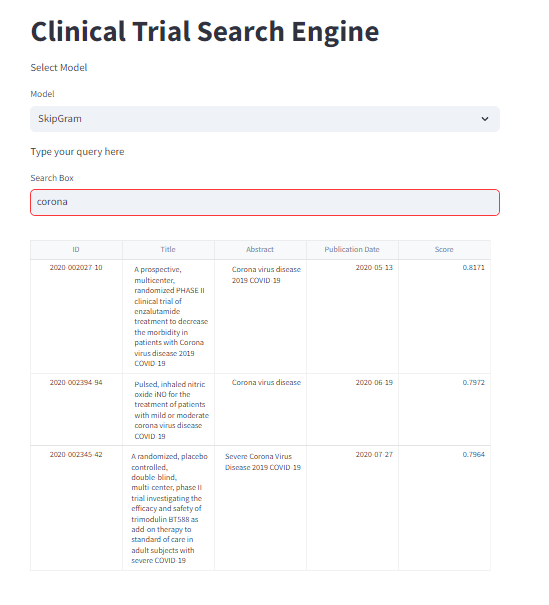